In [26]:
path = "/data7/users/deandres/newML2/"

RAs = np.arange(0,29)
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from utils import plot_cluster

def read_xr(lp,hid,RA):
    region = 'X-ray/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-Athena-wfi-cl-{}-ra-{}.fits'.format(s,hid,RA)
    print(RA)
    data = fits.getdata(path+region+file)
    return data

def read_sz(lp,hid,RA):
    region = 'SZ/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-TT-cl-{}-ra-{}.fits'.format(s,hid,RA)
    print(RA)
    data = fits.getdata(path+region+file)
    return data

def read_dm(lp,hid,RA):
    region = 'DM/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-DM-cl-{}-ra-{}.fits'.format(s,hid,RA)
    print(RA)
    data = fits.getdata(path+region+file)
    return data
def get_M2(lp,hid,RA):
    region = 'DM/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-DM-cl-{}-ra-{}.fits'.format(s,hid,RA)
    #print(RA)
    hdul = fits.open(path+region+file)
    M = np.float(hdul[0].header[-2][12:18])
    return M
def get_M5(lp,hid,RA):
    region = 'DM/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-DM-cl-{}-ra-{}.fits'.format(s,hid,RA)
    #print(RA)
    hdul = fits.open(path+region+file)
    M = np.float(hdul[0].header[-9][12:18])
    return M

In [27]:
selecth = np.load('/home2/weiguang/Project-300-Clusters/ML/Reselected_all_halos.npy')

lp=1
idr = np.where(np.int32(selecth[:,2]+0.1)==lp)[0]
if len(idr)<1:
    raise ValueError('No regions find in selected halo',lp)

Hids = np.int64(selecth[idr,0]+0.1)    #AHF halo IDs
sn = np.array([np.int32(str(i)[:3]) for i in Hids])
idshid = np.argsort(Hids)
Hids = Hids[idshid]; sn=sn[idshid]; idr=idr[idshid]
st = 0

In [28]:
M_200 = []
for hid in Hids:
    for RA in [0]:
        M_200.append(get_M5(lp,hid,RA))
        print(M_200)

ValueError: could not convert string to float: ''

In [29]:
import h5py
h5_path = path + "h5files/"
df = h5py.File(h5_path+'128.h5', 'r')


In [30]:
df.keys()

<KeysViewHDF5 ['DM', 'M_200', 'SZ', 'Xray']>

In [38]:
df['SZ'].shape

(2580, 29, 128, 128)

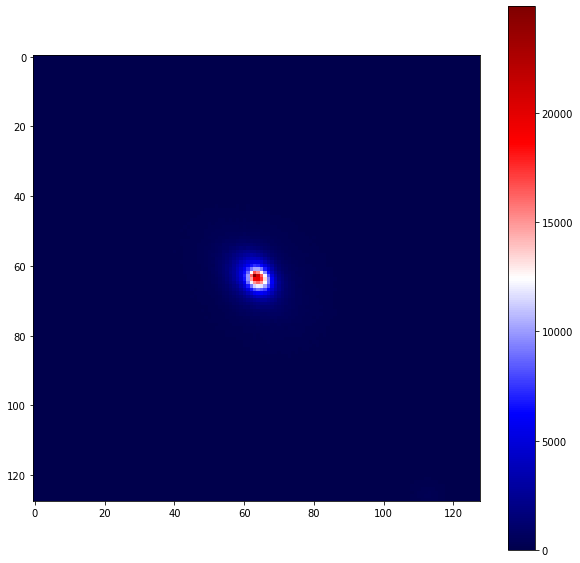

In [34]:
plot_cluster(df['Xray'][2579,0,:,:])